# Environment Preparation

## Imports

In [7]:
import pandas as pd
import numpy as np
import cross_validation as cv
import random
from IPython.core.display   import HTML

from tabulate import tabulate
from cross_validation import runCrossValidation
from xgboost import XGBClassifier

## Path Handlers

In [8]:
datapath = '../data/'
display( HTML( '<style>.container { width:100% !important; }</style>') )

 # Load data

In [9]:
#train
x_train = pd.read_csv(datapath+'x_train.csv', index_col=0)
y_train = pd.read_csv(datapath+'y_train.csv', index_col=0)

#validation
x_val = pd.read_csv(datapath+'x_val.csv', index_col=0)
y_val = pd.read_csv(datapath+'y_val.csv', index_col=0)

# Xgboost Cross Validation

Run 5 XGBoost models with random hyperparameter setups, and perform a cross-validation on each one, with 10 different cuts in the data, to get the best setup possible.

In [10]:
## session with high processing time: ??
## results compiled in the following table

param = {
    'n_estimators':  [100, 300, 500],
    'max_depth': [3,5,9], 
    'scale_pos_weight': [1, 9]
}

max_eval = 5

for i in range(max_eval):
    # random choice of dictionary values
    hp = {k: random.sample(v,1)[0] for k, v in param.items()}
    print(hp)

    # model definition
    xgb_model = XGBClassifier(n_estimators = hp['n_estimators'],
                                        max_depth = hp['max_depth'],
                                        scale_pos_weight = hp['scale_pos_weight'],
                                        n_jobs= -1)
    
    
    display(cv.runCrossValidation(xgb_model, x_train, x_val, y_train, y_val, n_splits = 10, n_repeats = 2, top_k = 12200))

{'n_estimators': 100, 'max_depth': 5, 'scale_pos_weight': 9}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,mean,std
precision_at_k,0.282832,0.001558
recall_at_k,0.923397,0.005101


{'n_estimators': 100, 'max_depth': 3, 'scale_pos_weight': 1}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,mean,std
precision_at_k,0.281918,0.001467
recall_at_k,0.920413,0.004814


{'n_estimators': 300, 'max_depth': 5, 'scale_pos_weight': 1}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,mean,std
precision_at_k,0.283037,0.001404
recall_at_k,0.924066,0.004599


{'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 1}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,mean,std
precision_at_k,0.282967,0.001357
recall_at_k,0.923839,0.004447


{'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 9}


/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,mean,std
precision_at_k,0.281963,0.001470
recall_at_k,0.920560,0.004813


Results of the 5 models and their hyperparameters

In [12]:
final_results = {'model':['#1', '#2', '#3', '#4', '#5'],
                 'precision_at_k': ['0.282832 +/- 0.001558',
                                    '0.281918 +/- 0.001467',
                                    '0.283037 +/- 0.001404',
                                    '0.282967 +/- 0.001357',
                                    '0.281963 +/- 0.001470'],
                 'recall_at_k': ['0.923397 +/- 0.005101',
                                 '0.920413 +/- 0.004814',
                                 '0.924066 +/- 0.004599',
                                 '0.923839 +/- 0.004447',
                                 '0.920560 +/- 0.004813'],
                 'parameters': ["'n_estimators': 100, 'max_depth': 5, 'scale_pos_weight': 9",
                                "'n_estimators': 100, 'max_depth': 3, 'scale_pos_weight': 1",
                                "'n_estimators': 300, 'max_depth': 5, 'scale_pos_weight': 1",
                                "'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 1",
                                "'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 9"]
                }

print(tabulate(final_results, headers=['model','precision@k','recall@k', 'hyperparameters'], tablefmt="fancy_grid"))

╒═════════╤═══════════════════════╤═══════════════════════╤════════════════════════════════════════════════════════════╕
│ model   │ precision@k           │ recall@k              │ hyperparameters                                            │
╞═════════╪═══════════════════════╪═══════════════════════╪════════════════════════════════════════════════════════════╡
│ #1      │ 0.282832 +/- 0.001558 │ 0.923397 +/- 0.005101 │ 'n_estimators': 100, 'max_depth': 5, 'scale_pos_weight': 9 │
├─────────┼───────────────────────┼───────────────────────┼────────────────────────────────────────────────────────────┤
│ #2      │ 0.281918 +/- 0.001467 │ 0.920413 +/- 0.004814 │ 'n_estimators': 100, 'max_depth': 3, 'scale_pos_weight': 1 │
├─────────┼───────────────────────┼───────────────────────┼────────────────────────────────────────────────────────────┤
│ #3      │ 0.283037 +/- 0.001404 │ 0.924066 +/- 0.004599 │ 'n_estimators': 300, 'max_depth': 5, 'scale_pos_weight': 1 │
├─────────┼─────────────────────

The results of the models were similar, and the best performer in precision@k and racall@k was the number #3

# Model training and ranked list export

Train, plot gain and lift curves, and metrics of precision@k and recall@k of number #3

In [13]:
# model definition
xgbclassifier_model = XGBClassifier(n_estimators = 300,
                                    max_depth = 5,
                                    scale_pos_weight = 1,
                                    n_jobs= -1)

# model training
xgbclassifier_model.fit(x_train, y_train.values.ravel())

# model prediction (proba)
yhat_proba = xgbclassifier_model.predict_proba(x_val)

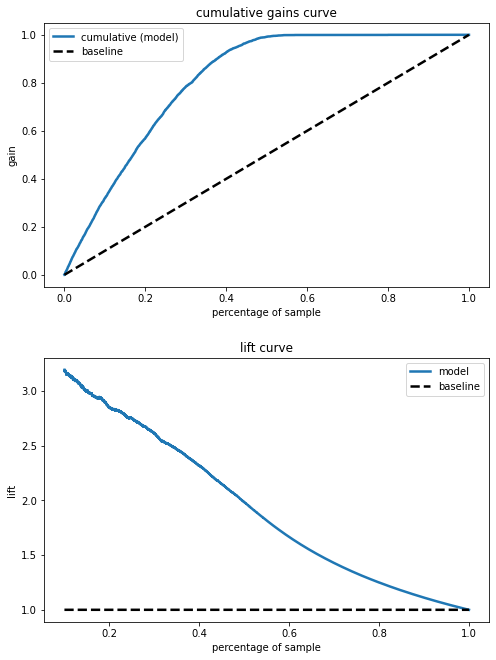

In [14]:
table_xgb = cv.gain_lift_curve(yhat_proba, y_val)
metrics_xgb, new_table_xgb = cv.precision_recall_at_k(table_xgb, 12200) #12200 = 40% of customers
new_table_xgb.to_pickle(datapath+'processed/xgb_table.pkl')

In [15]:
#Table of XGBoost data
new_table_xgb

,0,1,target,correct,propensity_score,cumulative_propensity_score,cumulative_porc_base,lift,ranking,precision_at_k,recall_at_k
0,0.168546,0.831454,1,yes,0.000268,0.000268,0.000033,8.158683,1,1.000000,0.000268
1,0.381681,0.618319,1,yes,0.000268,0.000535,0.000066,8.158683,2,1.000000,0.000535
2,0.385987,0.614013,0,no,0.000000,0.000535,0.000098,5.439122,3,0.666667,0.000535
3,0.392696,0.607304,0,no,0.000000,0.000535,0.000131,4.079342,4,0.500000,0.000535
4,0.398058,0.601942,0,no,0.000000,0.000535,0.000164,3.263473,5,0.400000,0.000535
...,...,...,...,...,...,...,...,...,...,...,...
30484,0.999922,0.000078,0,yes,0.000000,1.000000,0.999869,1.000131,30485,0.122585,1.000000
30485,0.999928,0.000072,0,yes,0.000000,1.000000,0.999902,1.000098,30486,0.122581,1.000000
30486,0.999942,0.000058,0,yes,0.000000,1.000000,0.999934,1.000066,30487,0.122577,1.000000
30487,0.999943,0.000057,0,yes,0.000000,1.000000,0.999967,1.000033,30488,0.122573,1.000000


In [16]:
#XGBoost: Metrics of precision@k and recall@k -> k=12200 (40% of base).
metrics_xgb

(0.2840983606557377, 0.9274819373829275)